In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import os
print(os.getcwd())


C:\jupyter


In [5]:
import urllib.request

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
urllib.request.urlretrieve(url, "sms.tsv")



('sms.tsv', <http.client.HTTPMessage at 0x24d390922d0>)

In [6]:
data = pd.read_csv("sms.tsv", sep='\t', header=None, names=['label', 'message'])
data.head()



,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Convert labels to binary: spam = 1, ham = 0
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

# Split into input (X) and output (y)
X = data['message']
y = data['label_num']



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [9]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [10]:
model = MultinomialNB()
model.fit(X_train_counts, y_train)


MultinomialNB()

Accuracy: 0.9885139985642498


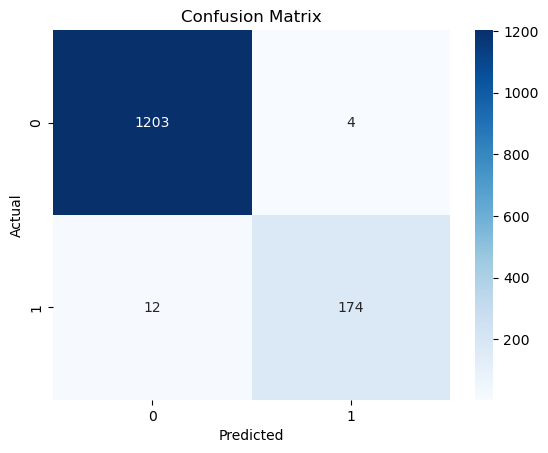

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       0.98      0.94      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [11]:
y_pred = model.predict(X_test_counts)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))
